# Skeletonization: 

Zhang's algorithm




## Example 1:

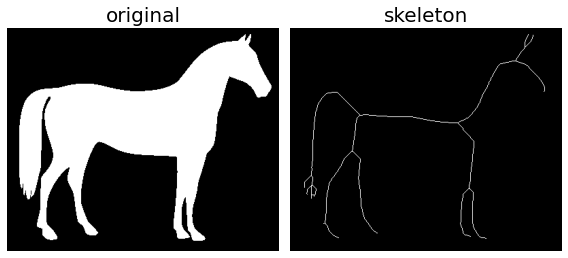

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

## Example 2:

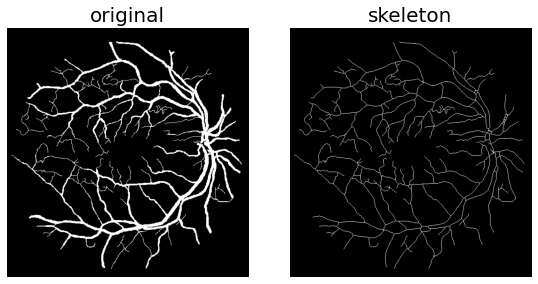

In [2]:
import skimage as sk # load skimage libraries
from skimage import io
import numpy as np
from skimage import img_as_bool
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

IC = sk.io.imread('25_manual1.gif') # read image using imread function

IBW = img_as_bool(IC)

# perform skeletonization
skeleton = skeletonize(IBW)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(IC, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

# Skeleton Analysis

Skan library:
https://jni.github.io/skan/

In [1]:
!pip install skan

     |████████████████████████████████| 9.1MB 4.1MB/s 
  Created wheel for skan: filename=skan-0.9-cp37-none-any.whl size=30021 sha256=268a1c11eb62796dc885f82711f188831d0a487a0d5d55625ef27bb53c082a79
  Stored in directory: /root/.cache/pip/wheels/72/5f/18/4ae643b112bd5ea7c188e3f62e21fba07c9587e808046eacca
Successfully built skan


Overlay skeleton and image:

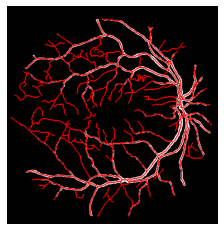

In [3]:
from skan import draw
fig, ax = plt.subplots()
draw.overlay_skeleton_2d(IBW, skeleton, dilate=1, axes=ax);

Get a sparse matrix encoding the network as a pixel graph. The pixel graph is a SciPy CSR matrix in which entry (𝑖,𝑗) is 0 if pixels 𝑖 and 𝑗 are not connected, and otherwise is equal to the distance between pixels 𝑖 and 𝑗 in the skeleton.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [4]:
from skan import skeleton_to_csgraph
pixel_graph, coordinates, degrees = skeleton_to_csgraph(skeleton)


The pixel graph is a SciPy CSR matrix in which entry (𝑖,𝑗) is 0 if pixels 𝑖 and 𝑗 are not connected, and otherwise is equal to the distance between pixels 𝑖 and 𝑗 in the skeleton. This will normally be 1 between adjacent pixels and $\sqrt{2}$ between diagonally adjacent pixels, but in this can be scaled by a spacing= keyword argument that sets the scale (and this scale can be different for each image axis). In our case, we know the spacing between pixels, so we can measure our network in physical units instead of pixels. 
The second variable contains the coordinates (in pixel units) of the points in the pixel graph. Finally, degrees is an image of the skeleton, with each skeleton pixel containing the number of neighbouring pixels. This enables us to distinguish between junctions (where three or more skeleton branches meet), endpoints (where a skeleton ends), and paths (pixels on the inside of a skeleton branch.

Get properties of each segment/branch. 

branch-types are:

0. endpoint-to-endpoint (isolated branch)

1. junction-to-endpoint

2. junction-to-junction

3. isolated cycle

In [5]:
from skan import Skeleton, summarize
branch_data = summarize(Skeleton(skeleton))
branch_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,1,233,152.795623,1,1.0,0.0,34.000000,255.000000,96.666667,380.666667,34.000000,255.000000,96.666667,380.666667,140.425148
1,1,5,120,49.698485,1,1.0,0.0,36.000000,240.000000,77.000000,261.000000,36.000000,240.000000,77.000000,261.000000,46.065171
2,1,88,119,8.962802,1,1.0,0.0,54.000000,379.000000,61.333333,382.666667,54.000000,379.000000,61.333333,382.666667,8.198916
3,1,99,119,8.714045,1,1.0,0.0,57.000000,389.000000,61.333333,382.666667,57.000000,389.000000,61.333333,382.666667,7.673910
4,1,119,233,37.905137,2,1.0,0.0,61.333333,382.666667,96.666667,380.666667,61.333333,382.666667,96.666667,380.666667,35.389892
